<a href="https://colab.research.google.com/github/ramakrishnan-thiyagu/Optimizing-investmrnt-in-stock-market/blob/main/Optimizing_Investments_in_Stock_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('bmh')

In [13]:
stock_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Stock project/stock_data.csv', index_col=['Date'], parse_dates=True)
print (stock_data.shape)

benchmark_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Stock project/benchmark_data.csv', parse_dates=True, index_col=['Date'])
print(benchmark_data.shape)

(252, 2)
(261, 1)


In [14]:
stock_data = stock_data.dropna()
benchmark_data = benchmark_data.dropna()

print(f'Shape of stock data: {stock_data.shape}')
print(f'Shape of benchmark data: {benchmark_data.shape}')

Shape of stock data: (252, 2)
Shape of benchmark data: (252, 1)


In [15]:
stock_data.describe()

,Amazon,Facebook
count,252.000000,252.000000
mean,699.523135,117.035873
std,92.362312,8.899858
min,482.070007,94.160004
25%,606.929993,112.202499
50%,727.875000,117.765000
75%,767.882492,123.902503
max,844.359985,133.279999


In [16]:
benchmark_data.describe()

,S&P 500
count,252.000000
mean,2094.651310
std,101.427615
min,1829.080000
25%,2047.060000
50%,2104.105000
75%,2169.075000
max,2271.720000


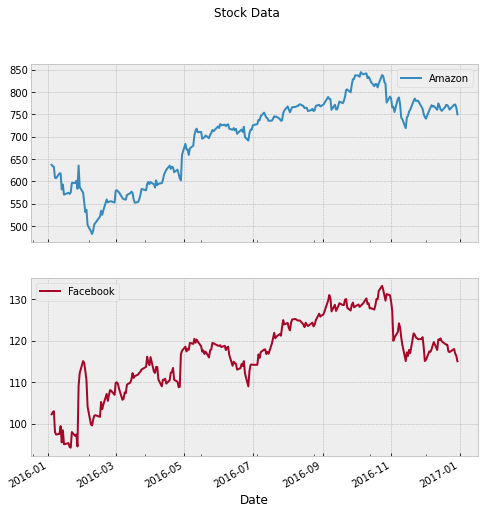

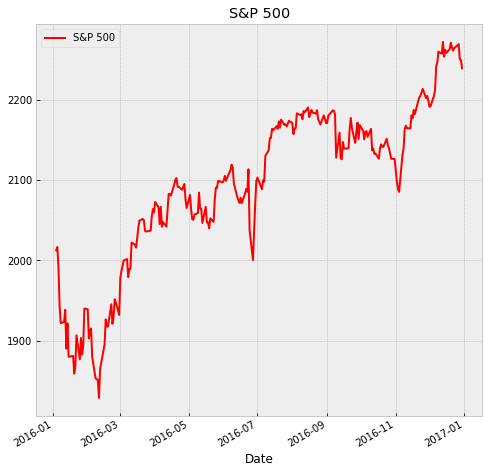

In [18]:
# lets visualize the Stock Market Data

plt.rcParams['figure.figsize'] = (8, 8)
stock_data.plot(subplots = True, title = 'Stock Data')
benchmark_data.plot(title = 'S&P 500', color = 'red')
plt.show()

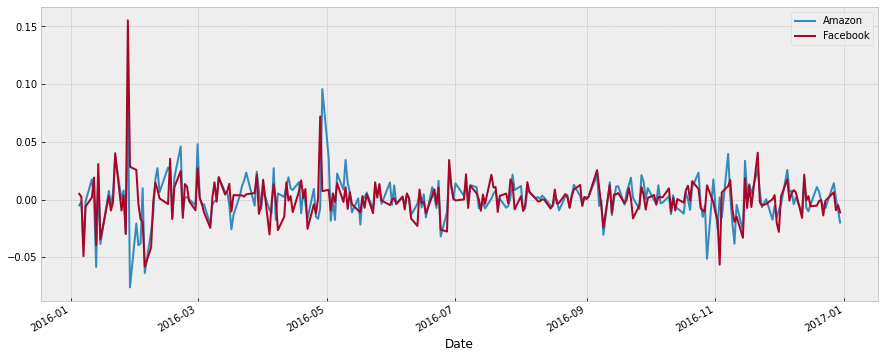

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000818,0.000626
std,0.018383,0.017840
min,-0.076100,-0.058105
25%,-0.007211,-0.007220
50%,0.000857,0.000879
75%,0.009224,0.008108
max,0.095664,0.155214


In [19]:
# calculate daily stock_data returns using the pct-change function
stock_returns = stock_data.pct_change()

# plot the daily returns using the plot function
plt.rcParams['figure.figsize'] = (15, 6)
stock_returns.plot()
plt.show()

# summarize the daily returns using describe function
stock_returns.describe()

count    251.000000
mean       0.000458
std        0.008205
min       -0.035920
25%       -0.002949
50%        0.000205
75%        0.004497
max        0.024760
Name: S&P 500, dtype: float64

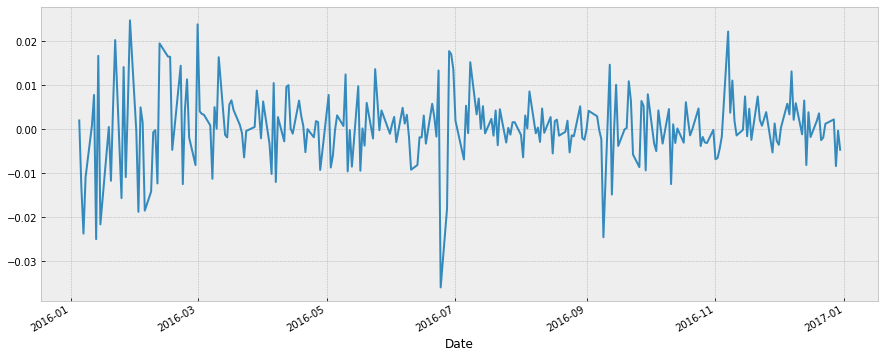

In [20]:
# calculate daily benchmark_data returns
sp_returns = benchmark_data['S&P 500'].pct_change()

# plot the daily returns
sp_returns.plot()

# summarize the daily returns
sp_returns.describe()

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000360,0.000168
std,0.016126,0.015439
min,-0.100860,-0.051958
25%,-0.006229,-0.005663
50%,0.000698,-0.000454
75%,0.007351,0.005814
max,0.100728,0.149686


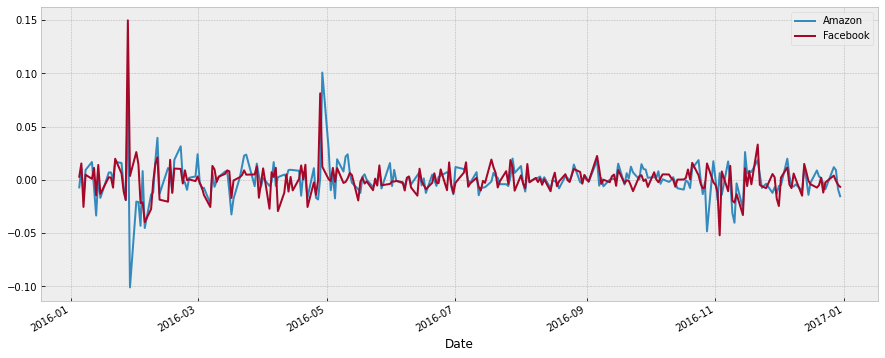

In [21]:
# calculate the difference in daily returns
excess_returns = stock_returns.sub(sp_returns, axis = 0)

# plot the excess_returns
excess_returns.plot()

# summarize the excess_returns
excess_returns.describe()

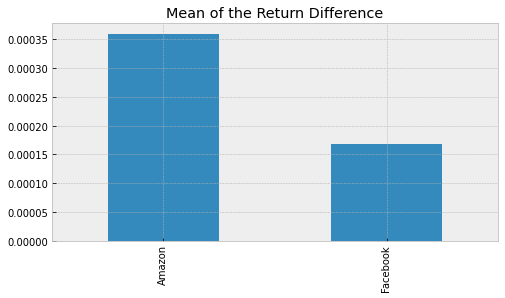

In [22]:
# calculate the mean of excess_returns 
avg_excess_return = excess_returns.mean()

# plot avg_excess_returns
plt.rcParams['figure.figsize'] = (8,4)
avg_excess_return.plot.bar(title = 'Mean of the Return Difference')
plt.show()

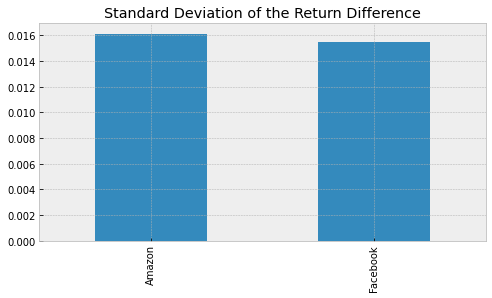

In [23]:
# calculate the standard deviations
sd_excess_return = excess_returns.std()

# plot the standard deviations
sd_excess_return.plot.bar(title = 'Standard Deviation of the Return Difference')
plt.show()

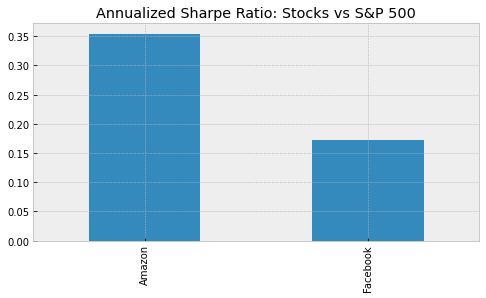

In [24]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# annualize the sharpe ratio
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# plot the annualized sharpe ratio
annual_sharpe_ratio.plot.bar(title = 'Annualized Sharpe Ratio: Stocks vs S&P 500')
plt.show()